# Spotify Hit Predictor model for 90's Dataset

### Load Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import joblib
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib as mpl #add'l plotting functionality

mpl.rcParams['figure.dpi'] = 400 #high res figures
plt.style.use('dark_background')

### Load Dataset

In [2]:
df = pd.read_csv('dataset-of-90s.csv')
df.head

<bound method NDFrame.head of                                                track           artist  \
0                                        Misty Roses  Astrud Gilberto   
1                                         Never Ever       All Saints   
2                                        Soul Sermon    Gregg Karukas   
3                          Clarinet Marmalade - Live    Alton Purnell   
4     До смерті і довше - Drum & Base and Rock Remix         Skryabin   
...                                              ...              ...   
5515                           (You're A) Go Nowhere     Reagan Youth   
5516                              La Fiebre de Norma     La Castañeda   
5517                                      Good Times    Edie Brickell   
5518                                           Inane            KMFDM   
5519              You Can Make History (Young Again)       Elton John   

                                       uri  danceability  energy  key  \
0     spotify:track:

In [3]:
df.shape

(5520, 19)

6398 smaples having 19 features.

### Shuffle The Data

In [4]:
df = df.sample(frac = 1)

### Balance The Dataset


#### Dropping Categorical features

In [5]:
X = df.drop(['target', 'track', 'artist', 'uri'], axis=1)

In [6]:
X.shape

(5520, 15)

Modified dataframe X


In [7]:
Y = df['target']

Now lets check if hits and flops counts are balanced

In [8]:
hit_flop_count = Y.value_counts()

In [9]:
hit_flop_count

1    2760
0    2760
Name: target, dtype: int64

We observe that dataset target values of hits and flops are well balanced.i.e, equal.

In [10]:
Y = Y.values

### Standardize The Inputs

In [11]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

### Split The Dataset into Train,Validation and Test

Training and Testing split (ratio of 90% to 10% respectively)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(scaled_X, Y, test_size=0.1, random_state=1)

Training and Validation split

In [13]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=(1/9), random_state=1)

In [14]:
x_train.shape, x_test.shape, x_val.shape

((4416, 15), (552, 15), (552, 15))

### Create The Deep Learning Algorithm

Using standard notations used globally for training neural networks

In [15]:
nn = 200 #number of neurons in hidden layers
target_count = 2

In [16]:
model_90 = tf.keras.Sequential()
model_90.add(tf.keras.layers.Flatten())

In [17]:
model_90.add(tf.keras.layers.Dense(nn, activation=tf.nn.relu))# first hidden  layer
model_90.add(tf.keras.layers.Dense(nn, activation=tf.nn.relu))# second hidden layer
model_90.add(tf.keras.layers.Dense(nn, activation=tf.nn.relu))# third hidden layer

In [18]:
model_90.add(tf.keras.layers.Dense(target_count, activation=tf.nn.softmax))# output layer

In [19]:
model_90.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Fitting the model

In [20]:
model_fit = model_90.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), batch_size=100)

Epoch 1/20
45/45 [==============================] - 1s 13ms/step - loss: 0.4347 - accuracy: 0.7948 - val_loss: 0.3656 - val_accuracy: 0.8388
Epoch 2/20
45/45 [==============================] - 0s 5ms/step - loss: 0.3592 - accuracy: 0.8451 - val_loss: 0.3781 - val_accuracy: 0.8351
Epoch 3/20
45/45 [==============================] - 0s 4ms/step - loss: 0.3426 - accuracy: 0.8582 - val_loss: 0.3688 - val_accuracy: 0.8424
Epoch 4/20
45/45 [==============================] - 0s 5ms/step - loss: 0.3302 - accuracy: 0.8601 - val_loss: 0.3652 - val_accuracy: 0.8496
Epoch 5/20
45/45 [==============================] - 0s 4ms/step - loss: 0.3269 - accuracy: 0.8610 - val_loss: 0.3594 - val_accuracy: 0.8605
Epoch 6/20
45/45 [==============================] - 0s 4ms/step - loss: 0.3107 - accuracy: 0.8709 - val_loss: 0.3736 - val_accuracy: 0.8424
Epoch 7/20
45/45 [==============================] - 0s 5ms/step - loss: 0.3032 - accuracy: 0.8750 - val_loss: 0.3628 - val_accuracy: 0.8514
Epoch 8/20
45/45 [=

In [21]:
#Storing the predictions
predictions = model_90.predict(x_test)

### Visualize Neural Network Loss History

#### Loss Variation Plot

In [22]:
training_loss = model_fit.history['loss']
validation_loss = model_fit.history['val_loss']
epoch_count1 = range(1, len(training_loss) + 1)

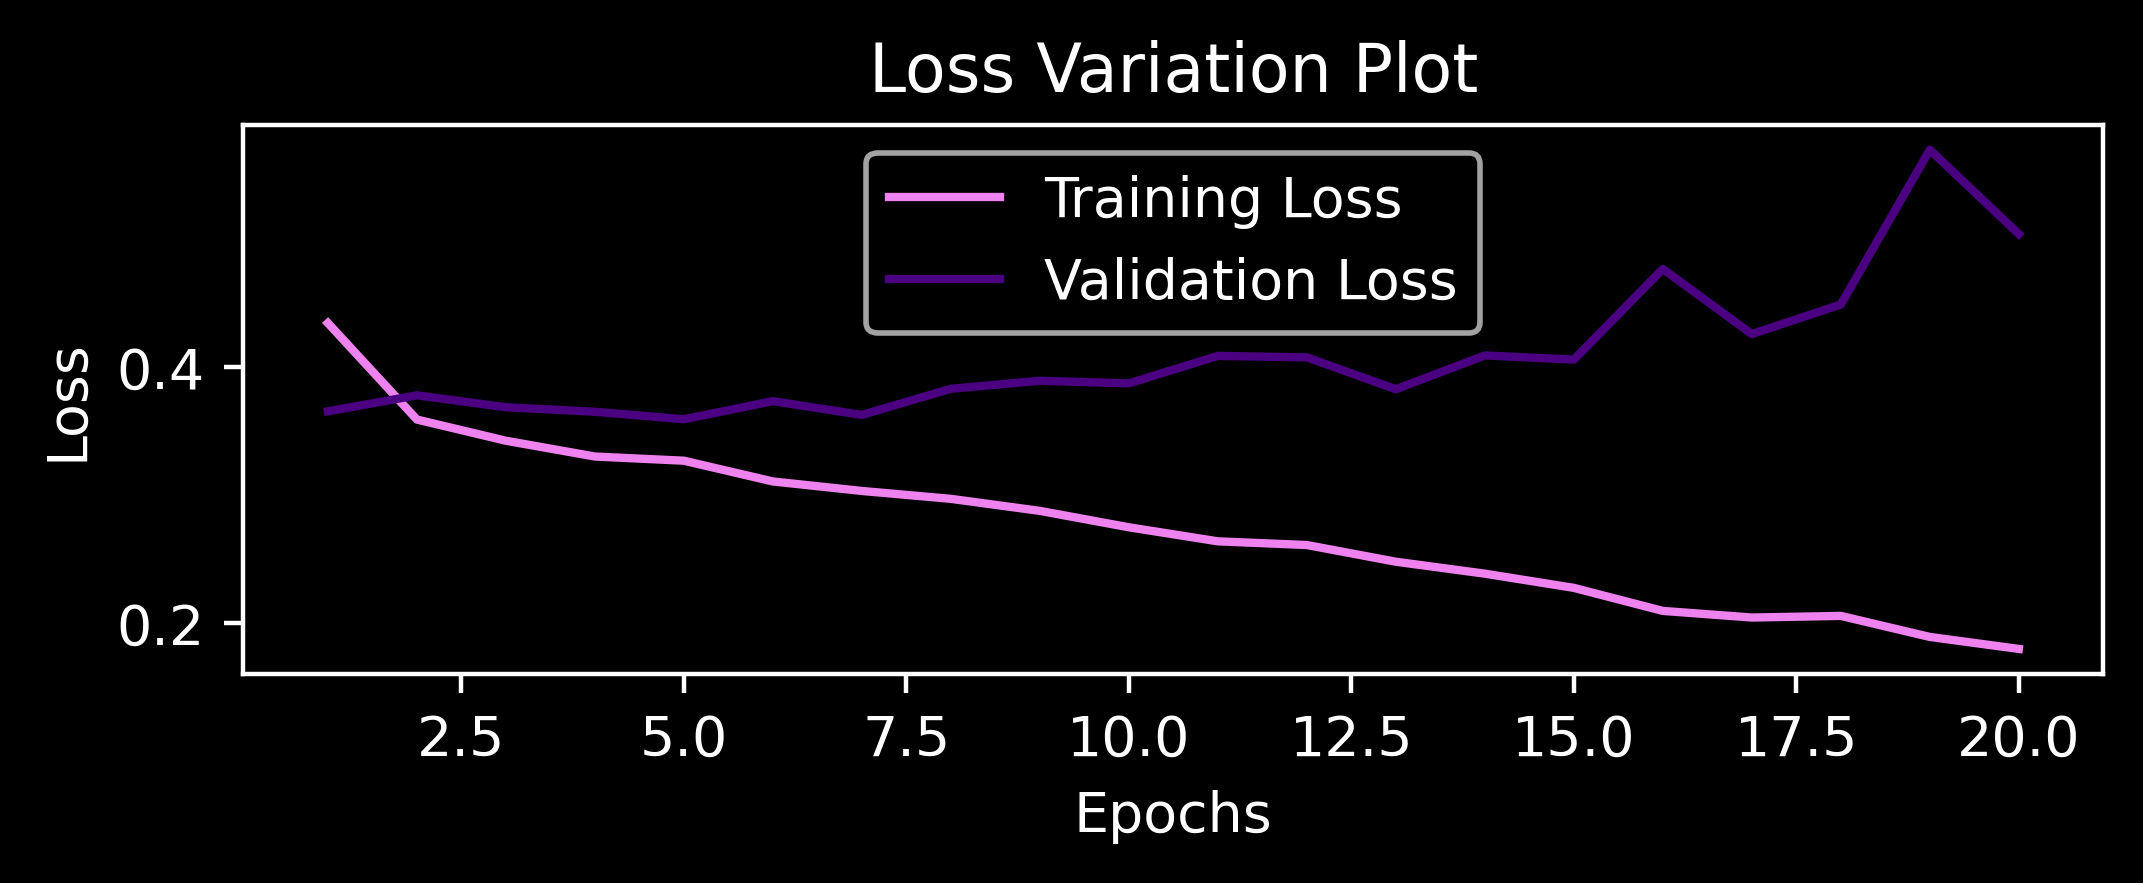

In [23]:
plt.subplot(2,1,2)
plt.title('Loss Variation Plot')
plt.plot(epoch_count1, training_loss, color='violet', label='Training Loss')
plt.plot(epoch_count1, validation_loss, color='indigo', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#### Accuracy Variation Plot

In [24]:
training_acc = model_fit.history['accuracy']
validation_acc = model_fit.history['val_accuracy']
epoch_count2 = range(1, len(training_acc) + 1)

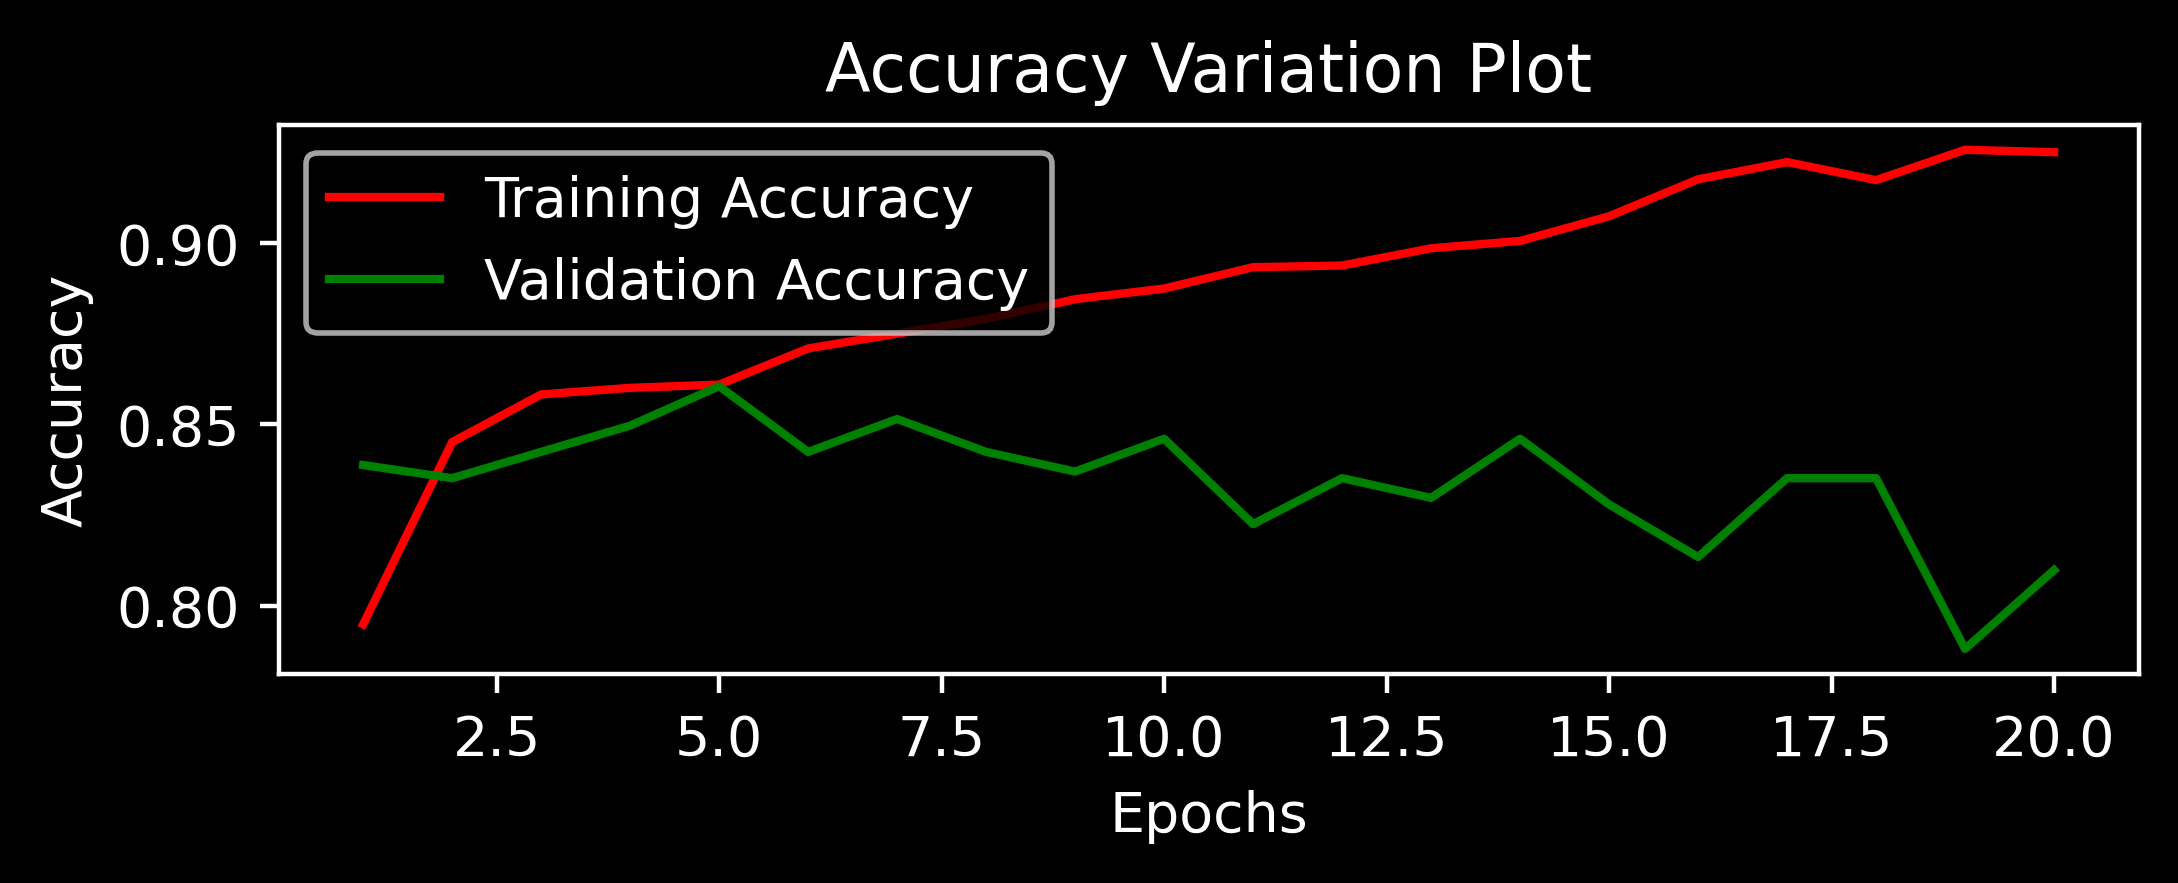

In [25]:
plt.subplot(2,1,2)
plt.title('Accuracy Variation Plot')
plt.plot(epoch_count2, training_acc, color='red', label='Training Accuracy')
plt.plot(epoch_count2, validation_acc, color='green', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

### Test The Model

In [26]:
print(predictions[215])
print('Predicted:', np.argmax(predictions[215]))
print('Original:', y_test[215])

[0.996079   0.00392094]
Predicted: 0
Original: 0


### Saving model and Verifying

In [27]:
model_90.save('Trained_model_90')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Trained_model_90\assets


In [28]:
model = tf.keras.models.load_model('Trained_model_90')
print(x_test[1])

[ 0.20574186 -0.58392556 -1.4989896   0.16849035  0.70250017  0.06714356
  0.03937245 -0.52512306 -0.41935834  0.71920748  0.56562837 -1.02804406
 -2.61516521 -0.94490498 -0.02860017]


In [29]:
print(x_test[1].reshape( 1,-1))

[[ 0.20574186 -0.58392556 -1.4989896   0.16849035  0.70250017  0.06714356
   0.03937245 -0.52512306 -0.41935834  0.71920748  0.56562837 -1.02804406
  -2.61516521 -0.94490498 -0.02860017]]


In [30]:
v = model.predict(x_test[1].reshape( 1,-1))
print(v)

[[0.93098587 0.06901418]]
